#### Kruskal’s Minimum Spanning Tree (MST) Algorithm:

A minimum spanning tree (MST) or minimum weight spanning tree for a weighted, connected, undirected graph is a spanning tree with a weight less than or equal to the weight of every other spanning tree.

##### Kruskal:

Kruskal's algorithm finds the Minimum Spanning Tree (MST), or Minimum Spanning Forest, in an undirected graph.

- The MST (or MSTs) found by Kruskal's algorithm is the collection of edges that connect all vertices (or as many as possible) with the minimum total edge weight.

- Kruskal's algorithm adds edges to the MST (or Minimum Spanning Forest), starting with the edges with the lowest edge weights.

- Edges that would create a cycle are not added to the MST.

- Minimum Spanning Forest is what it is called when a graph has more than one Minimum Spanning Tree. This happens when a graph is not connected.

- Unlike Prim's algorithm, Kruskal's algorithm can be used for such graphs that are not connected, which means that it can find more than one MST, and that is what we call a Minimum Spanning Forest.

In [1]:
class Graph:
    def __init__(self, size):
        self.size = size
        self.edges = []  # For storing edges as (u, v, weight)
        self.vertex_data = [''] * size  # Store vertex names

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.edges.append((u, v, weight))  # Add edge with weight
            
    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])

    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1

    def kruskals_algorithm(self):
        result = []  # MST
        i = 0  # edge counter

        self.edges = sorted(self.edges, key=lambda item: item[2])

        parent, rank = [], []

        for node in range(self.size):
            parent.append(node)
            rank.append(0)

        while i < len(self.edges):
            u, v, weight = self.edges[i]
            i += 1
            
            x = self.find(parent, u)
            y = self.find(parent, v)
            if x != y:
                result.append((u, v, weight))
                self.union(parent, rank, x, y)

        print("Edge \tWeight")
        for u, v, weight in result:
            print(f"{self.vertex_data[u]}-{self.vertex_data[v]} \t{weight}")

g = Graph(7)
g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(0, 1, 4)  #A-B,  4
g.add_edge(0, 6, 10) #A-G, 10
g.add_edge(0, 2, 9)  #A-C,  9
g.add_edge(1, 2, 8)  #B-C,  8
g.add_edge(2, 3, 5)  #C-D,  5
g.add_edge(2, 4, 2)  #C-E,  2
g.add_edge(2, 6, 7)  #C-G,  7
g.add_edge(3, 4, 3)  #D-E,  3
g.add_edge(3, 5, 7)  #D-F,  7
g.add_edge(4, 6, 6)  #E-G,  6
g.add_edge(5, 6, 11) #F-G, 11

print("Kruskal's Algorithm MST:")
g.kruskals_algorithm()

Kruskal's Algorithm MST:
Edge 	Weight
C-E 	2
D-E 	3
A-B 	4
E-G 	6
D-F 	7
B-C 	8


#### Introduction to Kruskal’s Algorithm:

Here we will discuss Kruskal’s algorithm to find the MST of a given weighted graph. 

In Kruskal’s algorithm, sort all edges of the given graph in increasing order. Then it keeps on adding new edges and nodes in the MST if the newly added edge does not form a cycle. It picks the minimum weighted edge at first and the maximum weighted edge at last. Thus we can say that it makes a locally optimal choice in each step in order to find the optimal solution. Hence this is a Greedy Algorithm.

#### How to find MST using Kruskal’s algorithm?

Below are the steps for finding MST using Kruskal’s algorithm:

1. Sort all the edges in non-decreasing order of their weight. 
2. Pick the smallest edge. Check if it forms a cycle with the spanning tree formed so far. If the cycle is not formed, include this edge. Else, discard it. 
3. Repeat step#2 until there are (V-1) edges in the spanning tree.


Step 2 uses the Union-Find algorithm to detect cycles. 

So we recommend reading the following post as a prerequisite. 

- Union-Find Algorithm | Set 1 (Detect Cycle in a Graph) 
- Union-Find Algorithm | Set 2 (Union By Rank and Path Compression)

Kruskal’s algorithm to find the minimum cost spanning tree uses the greedy approach. The Greedy Choice is to pick the smallest weight edge that does not cause a cycle in the MST constructed so far. Let us understand it with an example:

##### Illustration:

Below is the illustration of the above approach:



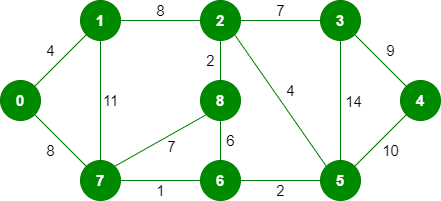

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k1.png")

The graph contains 9 vertices and 14 edges. So, the minimum spanning tree formed will be having (9 – 1) = 8 edges. 

After sorting:

| Weight | Source | Destination |
| ------ | ------ | ----------- |
| 1 | 7 | 6 |
| 2 | 8 | 2 |
| 2 | 6	| 5 |
| 4 | 0	| 1 |
| 4 | 2	| 5 |
| 6 | 8	| 6 |
| 7 | 2	| 3 |
| 7	| 7	| 8 |
| 8	| 0	| 7 |
| 8	| 1	| 2 |
| 9	| 3	| 4 |
| 10 | 5 | 4 |
| 11 | 1 | 7 |
| 14 | 3 | 5 |

Now pick all edges one by one from the sorted list of edges 



Step 1: Pick edge 7-6. No cycle is formed, include it. 

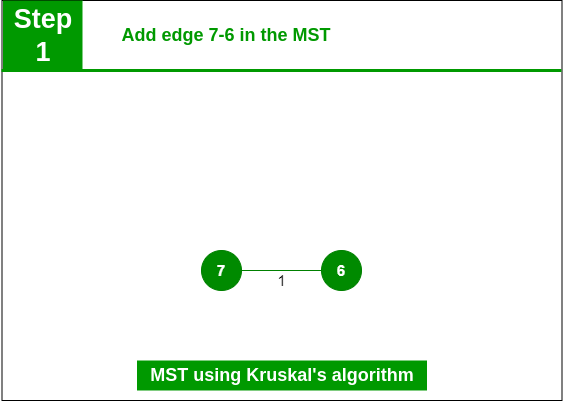

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k2.png")

Step 2:  Pick edge 8-2. No cycle is formed, include it. 

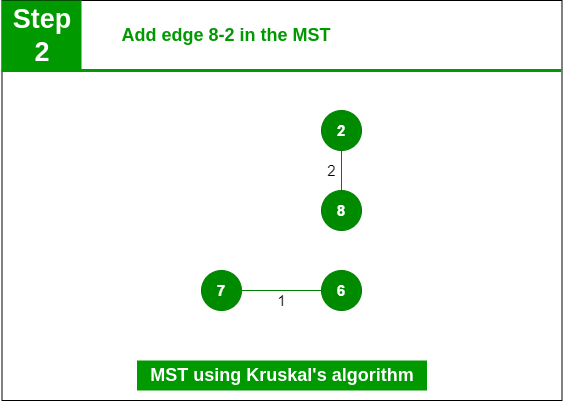

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k3.png")

Step 3: Pick edge 6-5. No cycle is formed, include it. 



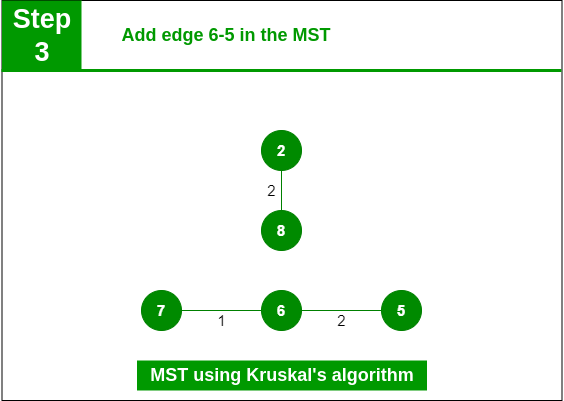

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k4.png")

Step 4: Pick edge 0-1. No cycle is formed, include it.



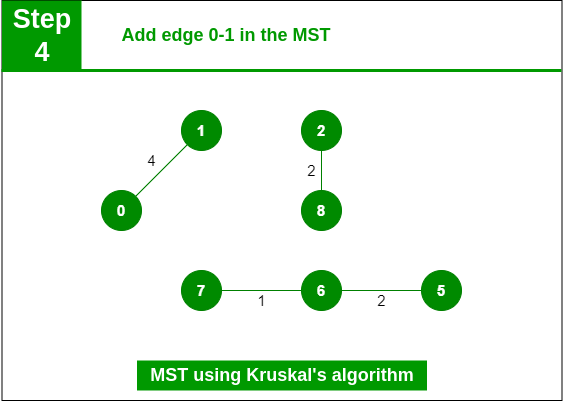

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k5.png")

Step 5: Pick edge 2-5. No cycle is formed, include it.



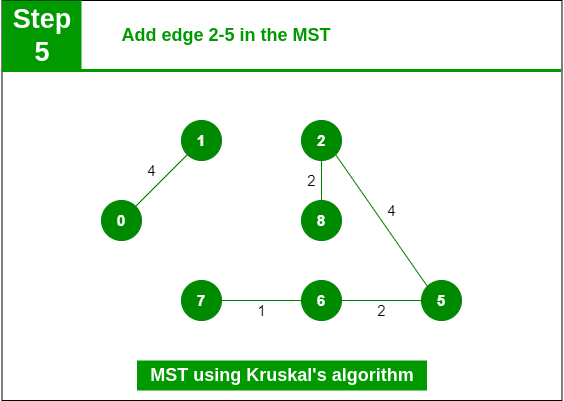

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k6.png")

Step 6: Pick edge 8-6. Since including this edge results in the cycle, discard it. Pick edge 2-3: No cycle is formed, include it.

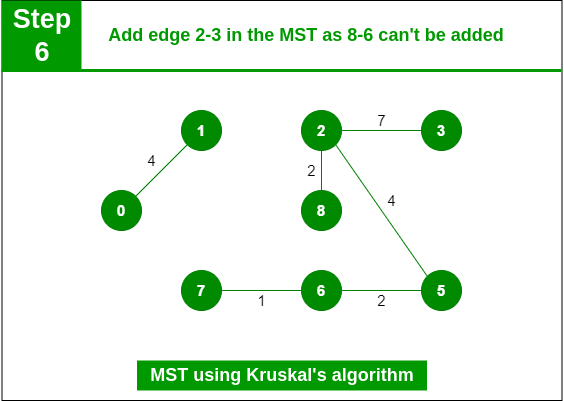

In [9]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k7.png")

Step 7: Pick edge 7-8. Since including this edge results in the cycle, discard it. Pick edge 0-7. No cycle is formed, include it.



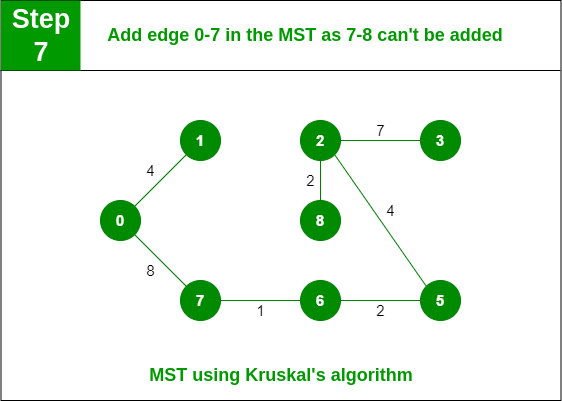

In [10]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k8.png")

Step 8: Pick edge 1-2. Since including this edge results in the cycle, discard it. Pick edge 3-4. No cycle is formed, include it.


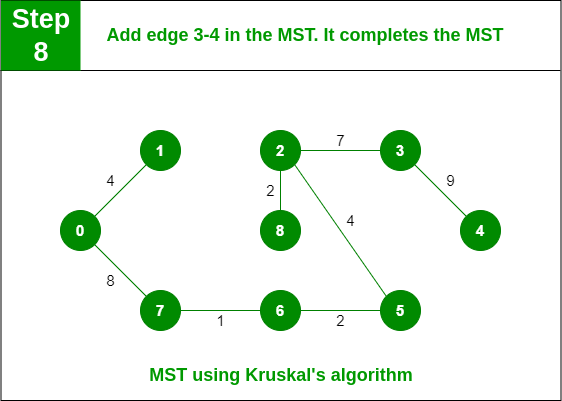

In [12]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/k9.png")

Note: Since the number of edges included in the MST equals to (V – 1), so the algorithm stops here

In [11]:
class Graph: 
	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [] 

	def addEdge(self, u, v, w): 
		self.graph.append([u, v, w]) 

	def find(self, parent, i): 
		if parent[i] != i: 
			parent[i] = self.find(parent, parent[i]) 
		return parent[i] 

	def union(self, parent, rank, x, y): 
		if rank[x] < rank[y]: 
			parent[x] = y 
		elif rank[x] > rank[y]: 
			parent[y] = x 
		else: 
			parent[y] = x 
			rank[x] += 1

	def KruskalMST(self): 
		result = [] 
		i = 0
		e = 0 
		self.graph = sorted(self.graph, key=lambda item: item[2]) 

		parent = [] 
		rank = [] 
		for node in range(self.V): 
			parent.append(node) 
			rank.append(0) 

		while e < self.V - 1: 
			u, v, w = self.graph[i] 
			i = i + 1
			x = self.find(parent, u) 
			y = self.find(parent, v) 
			if x != y: 
				e = e + 1
				result.append([u, v, w]) 
				self.union(parent, rank, x, y) 

		minimumCost = 0
		print("Edges in the constructed MST") 
		for u, v, weight in result: 
			minimumCost += weight 
			print("%d -- %d == %d" % (u, v, weight)) 
		print("Minimum Spanning Tree", minimumCost) 

if __name__ == '__main__': 
	g = Graph(4) 
	g.addEdge(0, 1, 10) 
	g.addEdge(0, 2, 6) 
	g.addEdge(0, 3, 5) 
	g.addEdge(1, 3, 15) 
	g.addEdge(2, 3, 4) 
	g.KruskalMST() 

Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19


##### Time Complexity: O(E * logE) or O(E * logV) 

Sorting of edges takes O(E * logE) time. 

After sorting, we iterate through all edges and apply the find-union algorithm. The find and union operations can take at most O(logV) time.
So overall complexity is O(E * logE + E * logV) time. 

The value of E can be at most O(V2), so O(logV) and O(logE) are the same. Therefore, the overall time complexity is O(E * logE) or O(E*logV)

##### Auxiliary Space: O(V + E)

where V is the number of vertices and E is the number of edges in the graph.